### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the nbgrader notebook.<br>
When calculating the final score shown to learners, the programming assignment takes the percentage of earned points vs. the total points provided by nbgrader and returns a score matching the equivalent percentage of the point value for the programming assignment. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if you change the variable or method signatures. 

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

# Homework 1. Neural Networks
This assignment has mixed types of theoretical and code implementation questions on multilayer perceptron and neural network training.

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

[Peer Review] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

**Part A** : Answer this question in this week's Peer Review assignment. Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights and biases as applicable:

i. $~ \texttt{ NOT } x_1$

ii. $~~x_1 \texttt{ NOR } x_2$

iii. $~~x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

### 1. $\texttt{ NOT } x_1$
This concept can be learned by single-layer perceptron.
Weights are:  
$w_1 = -1$  
$w_2 = 0$  
$bias = 1$


In [2]:
def fpass(W):
    X = np.array([[0, 0],[0, 1], [1, 0],[1, 1]])
    X_p = np.hstack((X,np.ones((X.shape[0],1))))
    return pandas.DataFrame(np.hstack((X, np.heaviside(X_p@W, 0))), 
                            columns=['x1', 'x2', 'y'], dtype=np.int8)


W = np.array([[-1, 0, 1]]).T
fpass(W)

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,0
3,1,1,0


### 2.  $x_1  \texttt{ NOR } x_2$
This concept can be learned by single-layer perceptron.
Weights are:  
$w_1 = -1$  
$w_2 = -1$  
$bias = 1$

In [3]:
W = np.array([[-1, -1, 1]]).T
fpass(W)

,x1,x2,y
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,0


## 3.  $x_1  \texttt{ XNOR } x_2$
The boolean representation of an XNOR gate is:  
$x_1x_2 + \bar{x}_1\bar{x}_2$  
So it consists of 3 perceptrons:  
$x_1\texttt{ AND }x_2$  
$x_1\texttt{ NOR }x_2$  
$\texttt{ OR }$  
That means we need two layers.



**Part B** : Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. <br>
In this week's Peer Review, describe your architecture and state your weight matrices and bias vectors. 

The boolean representation of an XNOR gate is:  
$x_1x_2 + \bar{x}_1\bar{x}_2$  

So it consists of 3 perceptrons:  
* $x_1\texttt{ AND }x_2$  
* $x_1\texttt{ NOR }x_2$  
* $\texttt{ OR }$  

That means we need two layers.  


<ul>
  <li>First layer
    <ul>
      <li>$x_1\texttt{ AND }x_2$ 
          <ul>
          <li>$w_{1,1} = 1$</li>
          <li>$w_{2,1} = 1$</li>
          <li>$bias_1 = -1$</li>
          </ul>
      <li>$x_1\texttt{ NOR }x_2$ 
          <ul>
          <li>$w_{1,1} = -1$</li>
          <li>$w_{2,1} = -1$</li>
          <li>$bias_2 = 1$</li>
          </ul>
    </ul>
  </li>
  <li>Second layer
      <ul>
      <li>$h_{1,1}\texttt{ OR }h_{1,2}$ 
          <ul>
          <li>$w_{1,1} = 1$</li>
          <li>$w_{2,1} = 1$</li>
          <li>$bias_1 = 0$</li>
          </ul>
    </li>
</ul> 

Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it correctly produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$. <br>
Answer the questions about this section in this week's Peer Review assignment.

In [4]:
# implement forward propagation for network
# show that it correctly produces the correct boolean output values 
# for each of the four possible combinations of x1 and x2 
# your code here

def fpass_xnor(W1, W2):
    X = np.array([[0, 0],[0, 1], [1, 0],[1, 1]])
    X_p = np.hstack((X,np.ones((X.shape[0],1))))
    output_1 = np.heaviside(X_p@W1, 0)
    output_1 = np.hstack((output_1,np.ones((output_1.shape[0],1))))

    output_2 = np.heaviside(output_1@W2, 0)
    return pandas.DataFrame(np.hstack((X, output_2)), 
                            columns=['x1', 'x2', 'y'], dtype=np.int8)

W1 = np.array([[1, 1, -1],[-1, -1, 1]]).T
W2 = np.array([[1, 1, 0]]).T
fpass_xnor(W1, W2)

,x1,x2,y
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


[15 points, Peer Review] Problem 2 - Back propagation
---

In this problem you'll gain some intuition about why training deep neural networks can be very time consuming.  Consider training the chain-like neural network seen below: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

**Part A**: Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. Answer the Peer Review question about this section.

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def fpass_A(X, W):
    X_p = np.hstack((X,np.ones((X.shape[0],1))))
    activity = X_p@W
    activation = sigmoid(activity)
    print("activity:",activity[0][0],"activation:",activation[0][0])
    return activation

X = np.array([[0.5]])
W = np.array([[1, -0.5]]).T

fpass_A(fpass_A(fpass_A(X, W),W), W)

activity: 0.0 activation: 0.5
activity: 0.0 activation: 0.5
activity: 0.0 activation: 0.5


array([[0.5]])

**Part B**: Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. Answer the Peer Review question about this section. 

$$
\begin{align}
&\dfrac{\partial \ell}{\partial W^k} = \dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial W^k}= \dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial W^k} \\
&\dfrac{\partial \ell}{\partial a^4}=\dfrac{1}{2}\dfrac{\partial (y-a^4)^2}{\partial a^4}=-(y-a^4) = 0.5\\
&\dfrac{\partial a}{\partial z^3} = \dfrac{\partial \sigma (z^3)}{\partial z^3} = \sigma (z^3)(1-\sigma (z^3)) = 0.5^2 = 0.2\\
&\dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3} = 0.5\cdot 0.25=0.125\\
&z^3 = a^2W^3 + b^3\\
&\dfrac{\partial z^3}{\partial W^3} = a^2\\
&\dfrac{\partial \ell}{\partial W^3} = \dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}a^2 = 0.125\cdot0.5 =0.0625\\
&\dfrac{\partial z^3}{\partial b^3} = 1\\
&\dfrac{\partial \ell}{\partial b^3} =\dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}1 =0.125\cdot1 = 0.125\\
&\dfrac{\partial \ell}{\partial b^2} = \dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial a^2} \dfrac{\partial a^2}{\partial z^2}\\
&\dfrac{\partial z^3}{\partial a^2}=W^3=1\\
&\dfrac{\partial a^2}{\partial z^2}=\sigma (z^2)(1-\sigma (z^2)) = 0.5^2 = 0.25\\
&\dfrac{\partial \ell}{\partial b^2} =\dfrac{\partial \ell}{\partial b^3}\cdot 0.25=0.125\cdot0.25=0.03125\\
&z^2 = a^1W^2 + b^2\\
&\dfrac{\partial \ell}{\partial W^2} = \dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial a^2} \dfrac{\partial a^2}{\partial z^2}\dfrac{\partial z^2}{\partial W^2}=\dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial a^2} \dfrac{\partial a^2}{\partial z^2}a^1\\
&\dfrac{\partial \ell}{\partial W^2} = \dfrac{\partial \ell}{\partial b^2}a^1=0.03125 \cdot 0.5=0.015625\\
&z^1 = xW^1 + b^1\\
&\dfrac{\partial \ell}{\partial b^1} = \dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial a^2} \dfrac{\partial a^2}{\partial z^2}\dfrac{\partial z^2}{\partial a^1} \dfrac{\partial a^1}{\partial z^1}\\
&\dfrac{\partial z^2}{\partial a^1} = W^2\\
&\dfrac{\partial a^1}{\partial z^1}=\sigma (z^1)(1-\sigma (z^1)) = 0.5^2 = 0.25\\
&\dfrac{\partial \ell}{\partial b^1} =\dfrac{\partial \ell}{\partial b^2}\cdot 0.25=0.03125\cdot0.25=0.0078125\\
&\dfrac{\partial \ell}{\partial W^1} = \dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial a^2} \dfrac{\partial a^2}{\partial z^2}\dfrac{\partial z^2}{\partial a^1} \dfrac{\partial a^1}{\partial z^1}\dfrac{\partial z^1}{\partial W^1}=\dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial a^2} \dfrac{\partial a^2}{\partial z^2}\dfrac{\partial z^2}{\partial a^1} \dfrac{\partial a^1}{\partial z^1}\dfrac{\partial z^1}{\partial a^0}\\
&\dfrac{\partial z^1}{\partial a^0} = x\\
&\dfrac{\partial \ell}{\partial W^1} =\dfrac{\partial \ell}{\partial a^4} \dfrac{\partial a^4}{\partial z^3}\dfrac{\partial z^3}{\partial a^2} \dfrac{\partial a^2}{\partial z^2}\dfrac{\partial z^2}{\partial a^1} \dfrac{\partial a^1}{\partial z^1}x = \dfrac{\partial \ell}{\partial b^1}x=0.0078125 \cdot 0.5 =0.00390625\\
\end{align}
$$

**PART C** Implement following activation functions:
* Relu
* Sigmoid
* softmax

In [80]:
import math

def relu(x):
    return np.max(x, 0)
    

def sigmoid(x):
    return 1/(1 + np.exp(-x))
    

def soft_max(x):
    e_x = np.exp(x)
    e_x_sum = np.sum(e_x, keepdims=True)
    return e_x/e_x_sum
    

In [81]:
# tests relu, sigmoid, and softmax functions 

In [83]:
x = np.array([[2, 8, 0]])

print(relu(x))
print(sigmoid(x))
print(soft_max(x))

[2 8 0]
[[0.88079708 0.99966465 0.5       ]]
[[2.47179601e-03 9.97193683e-01 3.34521213e-04]]


**PART D** Implement the following Loss functions:
* mean squared error
* mean absolute error
* hinge

In [70]:
def mean_squared_error(yhat,y):
    return np.square(y-yhat).mean()
    
    
def mean_absolute_error(yhat,y):
    return np.abs(y-yhat).mean()
    

def hinge(yhat,y):
    #new_y = np.array([-1 if i==0 else i for i in y])
    #new_yhat = np.array([-1 if i==0 else i for i in yhat])
    hinge_loss = np.array([max(0, 1-y_h*y) for y_h, y in zip(yhat, y)])
    return np.mean(hinge_loss)
    

In [71]:
# tests mean_squared_error, mean_absolute_error, and hinge

In [75]:
actual = np.array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])
predicted = np.array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])



print(mean_squared_error(predicted, actual))
print(mean_absolute_error(predicted, actual))
print(hinge(predicted, actual))

0.25
0.25
0.75


[Peer Review] Problem 3 - Build a feed-forward neural network
---

In this problem you'll implement a general feed-forward neural network class that utilizes sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Befor filling out the codes below, read the PART X instruction. The place you will complete the code is indicated as "TODO" in the code. Pleaes do not modify other parts of the code.

In [96]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
%matplotlib inline

class Network:
    def __init__(self, sizes):
        """
        Initialize the neural network 
        
        :param sizes: a list of the number of neurons in each layer 
        """
        # save the number of layers in the network 
        self.L = len(sizes) 
        
        # store the list of layer sizes 
        self.sizes = sizes  
        
        # initialize the bias vectors for each hidden and output layer 
        self.b = [np.random.randn(n, 1) for n in self.sizes[1:]]
        
        # initialize the matrices of weights for each hidden and output layer 
        self.W = [np.random.randn(n, m) for (m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the derivatives of biases for backprop 
        self.db = [np.zeros((n, 1)) for n in self.sizes[1:]]
        
        # initialize the derivatives of weights for backprop 
        self.dW = [np.zeros((n, m)) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the activities on each hidden and output layer 
        self.z = [np.zeros((n, 1)) for n in self.sizes]
        
        # initialize the activations on each hidden and output layer 
        self.a = [np.zeros((n, 1)) for n in self.sizes]
        
        # initialize the deltas on each hidden and output layer 
        self.delta = [np.zeros((n, 1)) for n in self.sizes]
        
    def g(self, z):
        """
        sigmoid activation function 
        
        :param z: vector of activities to apply activation to 
        """
        return 1.0 / (1.0 + np.exp(-z))
    
    def g_prime(self, z):
        """
        derivative of sigmoid activation function 
        
        :param z: vector of activities to apply derivative of activation to 
        """
        return self.g(z) * (1.0 - self.g(z))
    
    def grad_loss(self, a, y):
        """
        evaluate gradient of cost function for squared-loss C(a,y) = (a-y)^2/2 
        
        :param a: activations on output layer 
        :param y: vector-encoded label 
        """
        return (a - y)
    
    def forward_prop(self, x):
        """
        take an feature vector and propagate through network 
        
        :param x: input feature vector 
        """
        if len(x.shape) == 1:
            x = x.reshape(-1, 1)
        # TODO: step 1. Initialize activation on initial layer to x 
        # your code here
        self.a[0] = x
        
        ## TODO: step 2-4. Loop over layers and compute activities and activations 
        # your code here
        for i in range(self.L-1):
            self.z[i+1] = self.W[i]@self.a[i] + self.b[i]
            self.a[i+1] = self.g(self.z[i+1])
        
        
    def back_prop(self, x, y):
        """
        Back propagation to get derivatives of C wrt weights and biases for given training example
        
        :param x: training features  
        :param y: vector-encoded label 
        """
        
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)
        
        # TODO: step 1. forward prop training example to fill in activities and activations 
        # your code here
        self.forward_prop(x)
        
        # TODO: step 2. compute deltas on output layer (Hint: python index numbering starts from 0 ends at N-1)
        # your code here
        a = self.a[-1]
        self.delta[-1] = self.grad_loss(a, y) * self.g_prime(self.z[-1])
        
        # TODO: step 3-6. loop backward through layers, backprop deltas, compute dWs and dbs
        # your code here
        for i in range(self.L-2, -1, -1):
            self.dW[i] = self.delta[i+1]@self.a[i].T
            self.db[i] = self.delta[i+1]
            self.delta[i] = self.W[i].T@self.delta[i+1]*self.g_prime(self.z[i])
            
    def train(self, X_train, y_train, X_valid=None, y_valid=None,
              eta=0.25, num_epochs=10, isPrint=True, isVis=False):
        """
        Train the network with SGD 
        
        :param X_train: matrix of training features 
        :param y_train: matrix of vector-encoded labels 
        """
        
        # initialize shuffled indices 
        shuffled_inds = list(range(X_train.shape[0]))
        
        # loop over training epochs (step 1.)
        for ep in range(num_epochs):
            
            # shuffle indices 
            np.random.shuffle(shuffled_inds)
            
            # loop over training examples (step 2.) 
            for ind in shuffled_inds: 
                
                
                # TODO: step 3. back prop to get derivatives 
                # your code here
                self.back_prop(X_train[ind], y_train[ind])
                
                # TODO: step 4. update weights and biases 
                # your code here
                for i in range(self.L-1):
                    self.b[i] -= eta*self.db[i]
                    self.W[i] -= eta*self.dW[i]
                
                
            # print mean loss every 10 epochs if requested 
            if isPrint and (ep % 10) == 0:
                print("epoch {:3d}/{:3d}: ".format(ep, num_epochs), end="")
                print("  train loss: {:8.3f}".format(self.compute_loss(X_train, y_train)), end="")
                if X_valid is not None:
                    print("  validation loss: {:8.3f}".format(self.compute_loss(X_valid, y_valid)))
                else:
                    print("")
                    
            if isVis and (ep % 20) == 0:
                self.pretty_pictures(X_train, y_train, decision_boundary=True, epoch=ep)
                    
    def compute_loss(self, X, y):
        """
        compute average loss for given data set 
        
        :param X: matrix of features 
        :param y: matrix of vector-encoded labels 
        """
        loss = 0
        if len(X.shape) == 1:
            X = X[np.newaxis, :]
        if len(y.shape) == 1:
            y = y[np.newaxis, :]
        for x, t in zip(X, y):
            self.forward_prop(x)
            if len(t.shape) == 1:
                t = t.reshape(-1, 1)
            loss += 0.5 * np.sum((self.a[-1] - t) ** 2)
        return loss / X.shape[0]
    
    
    def gradient_check(self, x, y, h=1e-5):
        """
        check whether the gradient is correct for X, y
        
        Assuming that back_prop has finished.
        """
        for ll in range(self.L - 1):
            oldW = self.W[ll].copy()
            oldb = self.b[ll].copy()
            for i in range(self.W[ll].shape[0]):
                for j in range(self.W[ll].shape[1]):
                    self.W[ll][i, j] = oldW[i, j] + h
                    lxph = self.compute_loss(x, y)
                    self.W[ll][i, j] = oldW[i, j] - h
                    lxmh = self.compute_loss(x, y)
                    grad = (lxph - lxmh) / (2 * h)
                    assert abs(self.dW[ll][i, j] - grad) < 1e-5
                    self.W[ll][i, j] = oldW[i, j]
            for i in range(self.b[ll].shape[0]):
                j = 0
                self.b[ll][i, j] = oldb[i, j] + h
                lxph = self.compute_loss(x, y)
                self.b[ll][i, j] = oldb[i, j] - h
                lxmh = self.compute_loss(x, y)
                grad = (lxph - lxmh) / (2 * h)
                assert abs(self.db[ll][i, j] - grad) < 1e-5
                self.b[ll][i, j] = oldb[i, j]
        
        
            
    def pretty_pictures(self, X, y, decision_boundary=False, epoch=None):
        """
        Function to plot data and neural net decision boundary
        
        :param X: matrix of features 
        :param y: matrix of vector-encoded labels 
        :param decision_boundary: whether or not to plot decision 
        :param epoch: epoch number for printing 
        """
        
        mycolors = {"blue": "steelblue", "red": "#a76c6e"}
        colorlist = [c for (n,c) in mycolors.items()]
        colors = [colorlist[np.argmax(yk)] for yk in y]

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
        
        if decision_boundary:
            xx, yy = np.meshgrid(np.linspace(-1.25,1.25,300), np.linspace(-1.25,1.25,300))
            grid = np.column_stack((xx.ravel(), yy.ravel()))
            grid_pred = np.zeros_like(grid[:,0])
            for ii in range(len(grid_pred)):
                self.forward_prop(grid[ii,:])
                grid_pred[ii] = np.argmax(self.a[-1])
            grid_pred = grid_pred.reshape(xx.shape)
            cmap = ListedColormap([
                colorConverter.to_rgba('steelblue', alpha=0.30),
                colorConverter.to_rgba('#a76c63', alpha=0.30)])
            plt.contourf(xx, yy, grid_pred, cmap=cmap)
            if epoch is not None: plt.text(-1.23,1.15, "epoch = {:d}".format(epoch), fontsize=16)

        plt.scatter(X[:,0], X[:,1], color=colors, s=100, alpha=0.9)
        plt.axis('off')
        
def generate_data(N, config="checkerboard"):
    X = np.zeros((N,2))
    y = np.zeros((N,2)).astype(int)
    
    if config=="checkerboard":
        nps, sqlen = N//9, 2/3
        ctr = 0
        for ii in range(3):
            for jj in range(3):
                X[ctr * nps : (ctr + 1) * nps, :] = np.column_stack(
                    (np.random.uniform(ii * sqlen +.05-1, (ii+1) * sqlen - .05 -1, size=nps),
                     np.random.uniform(jj * sqlen +.05-1, (jj+1) * sqlen - .05 -1, size=nps))) 
                y[ctr*nps:(ctr+1)*nps,(3*ii+jj)%2] = 1 
                ctr += 1
                
    if config=="blobs":            
        X, yflat = datasets.make_blobs(n_samples=N, centers=[[-.5,.5],[.5,-.5]],
                                       cluster_std=[.20,.20],n_features=2)
        for kk, yk in enumerate(yflat):
            y[kk,:] = np.array([1,0]) if yk else np.array([0,1])
            
    
    if config=="circles":
        kk=0
        while kk < N / 2:
            sample = 2 * np.random.rand(2) - 1 
            if np.linalg.norm(sample) <= .45:
                X[kk,:] = sample 
                y[kk,:] = np.array([1,0])
                kk += 1 
        while kk < N:
            sample = 2 * np.random.rand(2) - 1
            dist = np.linalg.norm(sample)
            if dist < 0.9 and dist > 0.55:
                X[kk,:] = sample 
                y[kk,:] = np.array([0,1])
                kk += 1
                
    if config=="moons":
        X, yflat = datasets.make_moons(n_samples=N, noise=.05)
        X[:,0] = .5 * (X[:,0] - .5)
        X[:,1] = X[:,1] - .25
        for kk, yk in enumerate(yflat):
            y[kk, :] = np.array([1,0]) if yk else np.array([0,1])
            
    return X, y

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")        

We'll be using our network to do binary classification of two-dimensional feature vectors.  Scroll down to the **Helper Functions** and examine the function ``generate_data``. Then mess around with the following cell to look at the various data sets available.  

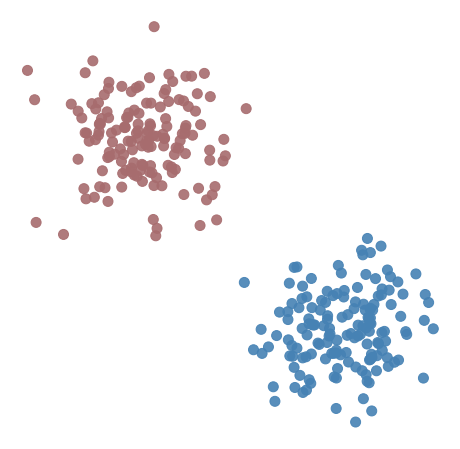

In [90]:
# play with this cell to look at the various data sets available
# your code here

nn = Network([2,3,2])
X_train, y_train = generate_data(300, "blobs")
nn.pretty_pictures(X_train, y_train, decision_boundary=False)

 Go up to the ``__init__`` function in the ``Network Class``.  How are we initializing a network?  What data structures are we using to store things like weights, biases, deltas, etc? 

**PART A.** Implementing Forward Propagation. 

Complete the ``forward_prop`` function to implement forward propagation.  Your function should take in a single training example ``x`` and propagate it forward in the network, setting the activations and activities on the hidden and output layers.  Remember that the pseudocode that we wrote for forward-prop looked as follows: 

1. $\quad$Initialize ${\bf a}^0 = {\bf x}$
2. $\quad$For $\ell = 0, \ldots, L-1$: 
3. $\quad\quad\quad{\bf z}^{\ell+1} = W^\ell {\bf a}^\ell + {\bf b}^\ell$
3. $\quad\quad\quad{\bf a}^{\ell+1} = g({\bf z}^{\ell+1})$

When you think you're done, we can instantiate a ``Network`` with with $2$ neurons in the input layer, $3$ neurons in the sole hidden layer, and $2$ neurons in the output layer, and then forward prop one of the training examples. 

Check that your indexing was correct by making sure that all of the activations are now non-zero (remember, we initialized them to vectors of zeros). 

What other things could we check?<br>
Answer the question about this section in this week's Peer Review assignment. 

In [91]:
# test your forward_prop function
nn = Network([2,3,2])
nn.forward_prop(X_train[0])
nn.z

[array([[0.],
        [0.]]),
 array([[-0.83859772],
        [ 0.46864698],
        [ 0.55022705]]),
 array([[ 1.00414077],
        [-2.0286153 ]])]

In [92]:
nn.a

[array([[-0.55439883],
        [ 0.6781137 ]]),
 array([[0.3018302 ],
        [0.61506347],
        [0.63418827]]),
 array([[0.73187192],
        [0.11623108]])]

**PART B.** Implementing Back Propagation

OK, now it's time to implement back propagation.  Complete the function ``back_prop`` in the ``Network`` class to use a single training example to compute the derivatives of the loss function with respect to the weights and the biases.  Remember, the pseudocode for back-prop was as follows: 

1. $\quad$Forward propagate the training example ${\bf x}$, ${\bf y}$
2. $\quad$Compute the $\delta^L = \dfrac{\partial \mathscr{L}}{\partial {\bf a}^L} \odot g'({\bf z}^L)$
3. $\quad$For $\ell = L-1, \ldots, 1$: 
4. $\quad\quad\quad \dfrac{\partial \mathscr{L}}{\partial W^\ell} = \delta^{\ell+1} ({\bf a}^\ell)^T$
5. $\quad\quad\quad \dfrac{\partial \mathscr{L}}{\partial {\bf b}^\ell} = \delta^{\ell+1}$
6. $\quad\quad\quad\delta^{\ell} = (W^\ell)^T\delta^{\ell+1} \odot g'({\bf z}^\ell)$

When you think you're done, instantiate a small ``Network`` and call back-prop for a single training example.  

Check that it's likely working by checking that the derivative matrices ``dW`` and ``db`` are nonzero. <br>
Answer the question about this section in this week's Peer Review assignment. 

In [93]:
# test back_prop
nn = Network([2,3,2])
nn.back_prop(X_train[0,:], y_train[0,:])
print(nn.W[0])

[[-0.39730143  0.63675574]
 [ 0.2863518  -0.36256405]
 [-1.15404675 -1.10816019]]


In [94]:
nn.dW

[array([[ 0.0244665 , -0.02992623],
        [-0.00961668,  0.01176265],
        [-0.05969653,  0.07301789]]),
 array([[ 0.09525241,  0.02204952,  0.06419436],
        [-0.10097723, -0.02337473, -0.06805254]])]

In [95]:
# test gradient_check 
nn.gradient_check(X_train[0, :], y_train[0, :])
print(nn.W[0])

[[-0.39730143  0.63675574]
 [ 0.2863518  -0.36256405]
 [-1.15404675 -1.10816019]]


**Note:** Next week, we will cover stochastic gradient descent. We encourage you to complete the following sections to train your model and get some results if you know how to do so. These sections are ungraded, so don't feel pressure to skip ahead a week in the material. 

**PART C. [Ungraded]** Implementing trainning using stochastic gradient descent 

OK, now let's actually train a neural net!  Complete the missing code in ``train`` to loop over the training data in random order, call back-prop to get the derivatives, and then update the weights and the biases via SGD. SGD uses minibatch to update weights. The training algorithm is following.
1. For epoch = 0,1,...,N:
2.     For (Xbatch, ybatch) in minibatches:
3.         Compute gradients using backpropagation for the minibatch data
4.         Update the weights (W, b) in the all layers (use loop over layer)    

When you think you're done, execute the following code and watch the training loss evolve over the training process.  If you've done everything correctly, it'll hopefully go down! <br><br>
Check out the solution in this week's Peer Review assignment. 

In [106]:
nn = Network([2,3,2])
nn.train(X_train, y_train, X_valid=None, y_valid=None,
              eta=0.25, num_epochs=40, isPrint=True, isVis=False)

epoch   0/ 40:   train loss:    0.054
epoch  10/ 40:   train loss:    0.002
epoch  20/ 40:   train loss:    0.001
epoch  30/ 40:   train loss:    0.001


**PART D.[Ungraded]**     
OK! If you think you've worked out the bugs, let's start looking at the results. We'll build a simple neural network, train it on a training set, and watch the decision boundary of our classifier evolve to fit the data. We can do this by running similar code as above, but with the isVis flag set to True. Note that producing the plots takes considerable computational work, so things will go a bit slower now.

Start with the blobs data set, and then move on to more complicated data sets like moons, circles, and finally the checkerboard. Note that for these more complicated geometries, it'll probably be necessary to chain the number of neurons in your hidden layer, or even add more hidden layers! <br>
Check out the solution in this week's Peer Review assignment. 

epoch   0/ 65:   train loss:    0.222
epoch  10/ 65:   train loss:    0.052
epoch  20/ 65:   train loss:    0.020
epoch  30/ 65:   train loss:    0.011
epoch  40/ 65:   train loss:    0.008
epoch  50/ 65:   train loss:    0.006
epoch  60/ 65:   train loss:    0.004


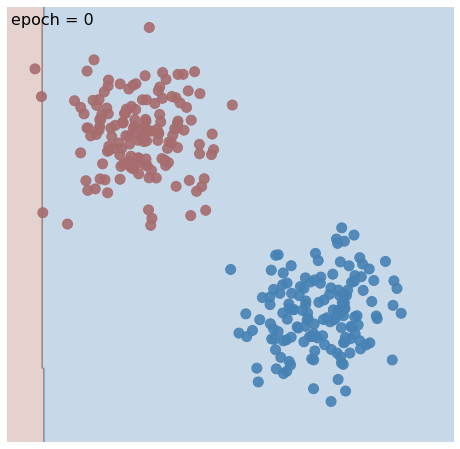

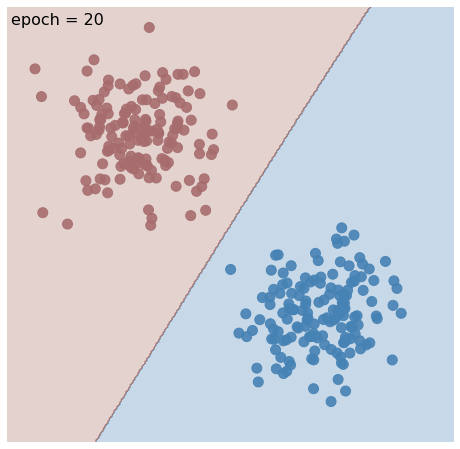

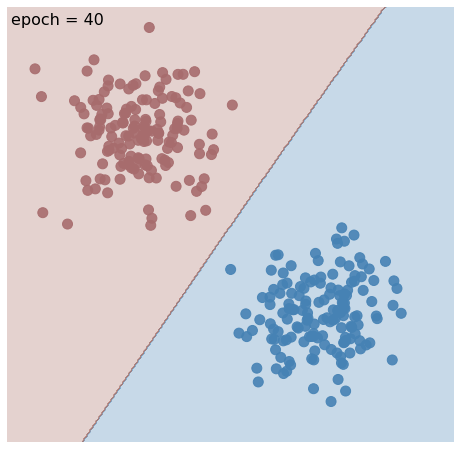

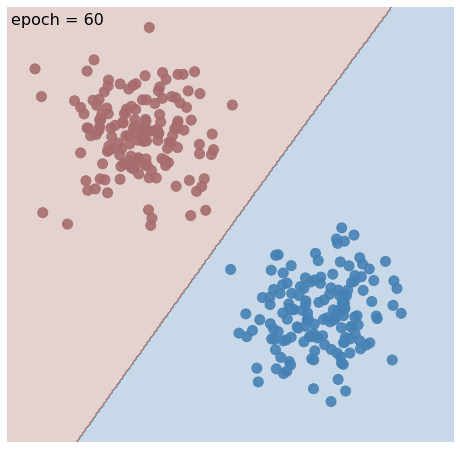

In [109]:
nn = Network([2,3,2])
nn.train(X_train, y_train, X_valid=None, y_valid=None,
              eta=0.03, num_epochs=65, isPrint=True, isVis=True)